In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler


pca_embeddings = np.load('embeddings/pca_embeddings.npy')
pca_embeddings.shape

scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(pca_embeddings)

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(labels, title):
    plt.scatter(scaled_embeddings[:, 0], scaled_embeddings[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

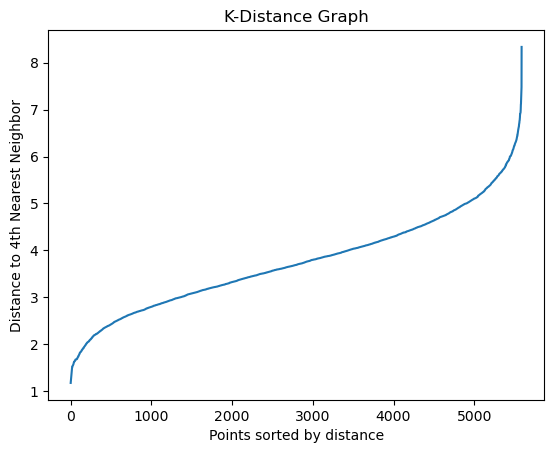

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Calculate distances to the 4th nearest neighbor (min_samples - 1)
neighbors = NearestNeighbors(n_neighbors=4)  # min_samples - 1
neighbors_fit = neighbors.fit(scaled_embeddings)
distances, _ = neighbors_fit.kneighbors(scaled_embeddings)

# Sort and plot the distances
distances = np.sort(distances[:, -1])  # Use the largest distance in each neighborhood
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 4th Nearest Neighbor")
plt.show()


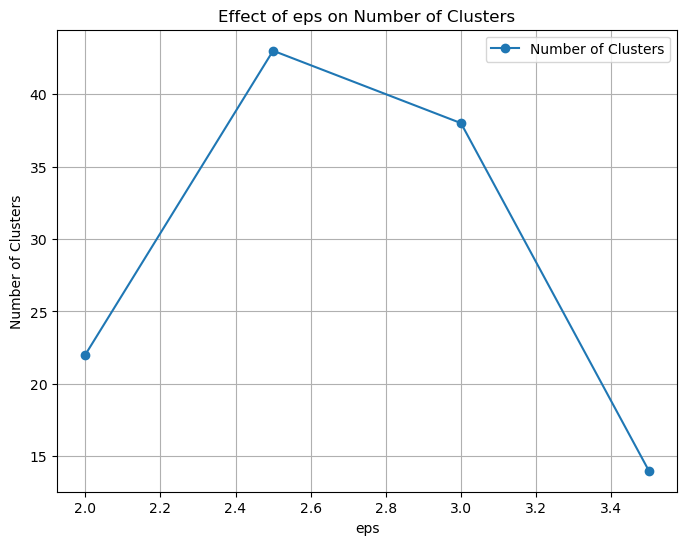

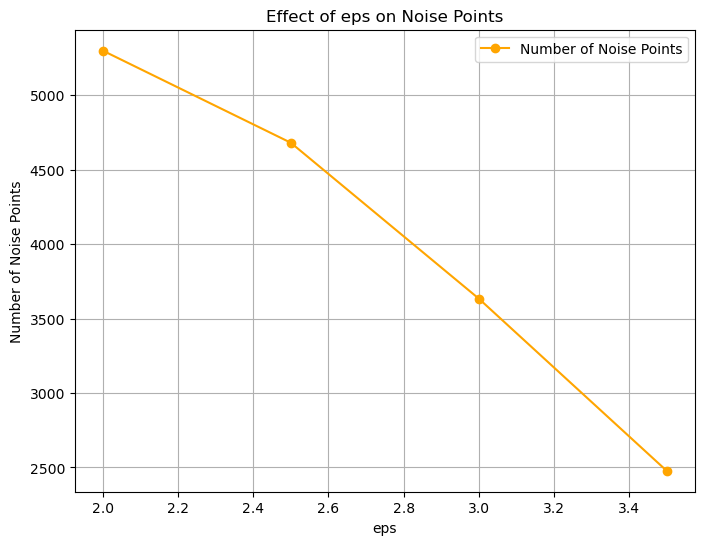

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Define a range of eps values to explore
eps_values = [2.0, 2.5, 3.0, 3.5]

# Placeholder to store results
cluster_results = {}

# Run DBSCAN for different eps values
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=4)
    cluster_labels = dbscan.fit_predict(scaled_embeddings)
    num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)  # Exclude noise
    noise_points = list(cluster_labels).count(-1)
    cluster_results[eps] = (num_clusters, noise_points)

# Plot results: Number of clusters vs eps
eps_list = list(cluster_results.keys())
num_clusters_list = [cluster_results[eps][0] for eps in eps_list]
noise_points_list = [cluster_results[eps][1] for eps in eps_list]

# Plot Number of Clusters
plt.figure(figsize=(8, 6))
plt.plot(eps_list, num_clusters_list, marker='o', label='Number of Clusters')
plt.title('Effect of eps on Number of Clusters')
plt.xlabel('eps')
plt.ylabel('Number of Clusters')
plt.grid()
plt.legend()
plt.show()

# Plot Noise Points
plt.figure(figsize=(8, 6))
plt.plot(eps_list, noise_points_list, marker='o', label='Number of Noise Points', color='orange')
plt.title('Effect of eps on Noise Points')
plt.xlabel('eps')
plt.ylabel('Number of Noise Points')
plt.grid()
plt.legend()
plt.show()

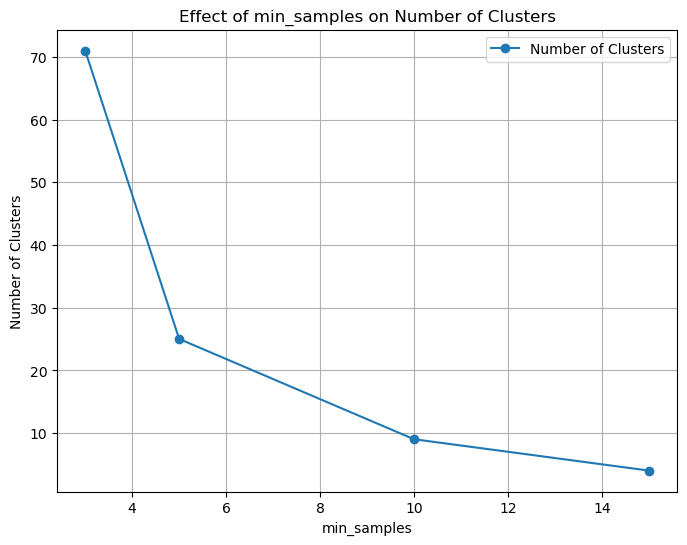

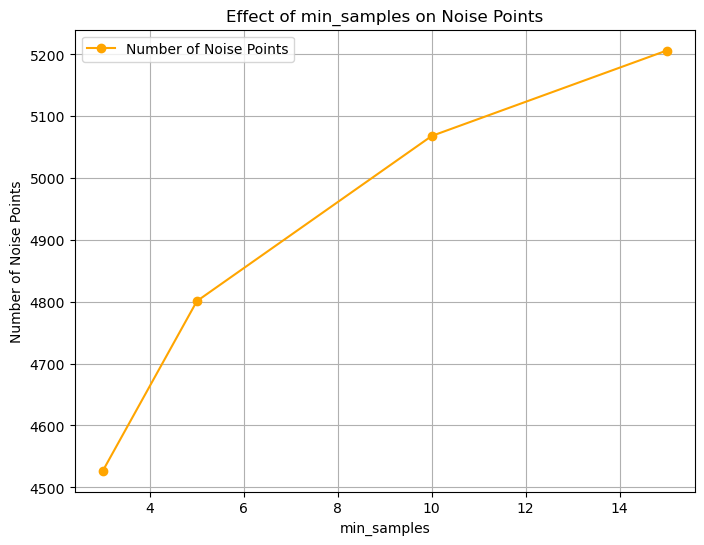

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Define a fixed eps value and range of min_samples to explore
eps = 2.5  # Set based on the k-distance graph
min_samples_values = [3, 5, 10, 15]

# Placeholder to store results
cluster_results = {}

# Run DBSCAN for different min_samples values
for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(scaled_embeddings)
    num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)  # Exclude noise
    noise_points = list(cluster_labels).count(-1)
    cluster_results[min_samples] = (num_clusters, noise_points)

# Plot results: Number of clusters vs min_samples
min_samples_list = list(cluster_results.keys())
num_clusters_list = [cluster_results[ms][0] for ms in min_samples_list]
noise_points_list = [cluster_results[ms][1] for ms in min_samples_list]

# Plot Number of Clusters
plt.figure(figsize=(8, 6))
plt.plot(min_samples_list, num_clusters_list, marker='o', label='Number of Clusters')
plt.title('Effect of min_samples on Number of Clusters')
plt.xlabel('min_samples')
plt.ylabel('Number of Clusters')
plt.grid()
plt.legend()
plt.show()

# Plot Noise Points
plt.figure(figsize=(8, 6))
plt.plot(min_samples_list, noise_points_list, marker='o', label='Number of Noise Points', color='orange')
plt.title('Effect of min_samples on Noise Points')
plt.xlabel('min_samples')
plt.ylabel('Number of Noise Points')
plt.grid()
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.5, min_samples=1)
cluster_labels_db = dbscan.fit_predict(scaled_embeddings)
plot_clusters(cluster_labels_db, 'DBSCAN clustering')
np.save('cluster_labels_db.npy', cluster_labels_db)